In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/data set/5G Slicing Datset Lable1.csv")
data

,User Device Type NUM,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type NUM,Slice Class
0,9,600,0.010000,50,30,17500,1082,43000000.0,0,0
1,9,100,0.010000,7,38,1700,2647,45000000.0,0,0
2,9,240,0.000010,46,38,900,2821,65000000.0,0,0
3,9,120,0.000100,12,50,900,864,77000000.0,0,0
4,9,60,0.000001,49,60,1700,1945,33000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,2,180,0.010000,40,38,1700,1476,77000000.0,2,1
2996,2,100,0.000010,28,29,300,512,10000000.0,2,1
2997,2,180,0.000001,25,29,300,1752,65000000.0,2,1
2998,2,300,0.001000,20,45,300,453,45000000.0,2,1


In [11]:
x=data.drop(['Slice Class'],axis=1)
y=data['Slice Class']

In [12]:
x.shape, y.shape

((3000, 9), (3000,))

In [13]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x)
data = pd.DataFrame(X_data_minmax,columns=['User Device Type NUM','Duration(sec)','Paket Loss Rate(Reliability)','Packet Delay Budget( Latency(ms))','Bandwidth(GHz)','Delay Rate(Mbps)','Speed(Mbps)','Jitter(ps)','Modulation Type NUM'])
data

,User Device Type NUM,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type NUM
0,0.888889,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,0.0
1,0.888889,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,0.0
2,0.888889,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,0.0
3,0.888889,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,0.0
4,0.888889,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,0.0
...,...,...,...,...,...,...,...,...,...
2995,0.111111,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,0.4
2996,0.111111,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,0.4
2997,0.111111,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,0.4
2998,0.111111,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,0.4


In [15]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts( x, y, test_size=0.30, random_state=10, shuffle=False )
print('Shape of X_train=',X_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (2100, 9)
Shape of X_test= (900, 9)
Shape of y_train= (2100,)
Shape of y_test= (900,)


In [17]:
from sklearn import svm

#clf_linear = svm.SVC(kernel='linear')
#clf_poly= svm.SVC(kernel='poly')
clf_rbf = svm.SVC(C=50,kernel='rbf',gamma=1)


In [18]:
#clf_linear1=clf_linear.fit(X_train, y_train)
#clf_poly1=clf_poly.fit(X_train, y_train)
clf_rbf1=clf_rbf.fit(X_train, y_train)

In [19]:
Yp =  clf_rbf1.predict(X_test)
#Yp =  clf_poly1.predict(X_test)

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, Yp, average= 'macro')
recall = recall_score(y_test, Yp, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, Yp))
print('F1 Score: %.3f' % f1_score(y_test, Yp, average= 'macro'))

Precision: 0.098
Recall: 0.333
Accuracy: 0.293
F1 Score: 0.151


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, Yp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.00      0.00      0.00       299
           2       0.29      1.00      0.45       264

    accuracy                           0.29       900
   macro avg       0.10      0.33      0.15       900
weighted avg       0.09      0.29      0.13       900



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print (confusion_matrix(y_test, Yp))

[[  0   0 337]
 [  0   0 299]
 [  0   0 264]]


# KNN

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import numpy as np
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/data set/5G Slicing Datset Lable1.csv")
data

,User Device Type NUM,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type NUM,Slice Class
0,9,600,0.010000,50,30,17500,1082,43000000.0,0,0
1,9,100,0.010000,7,38,1700,2647,45000000.0,0,0
2,9,240,0.000010,46,38,900,2821,65000000.0,0,0
3,9,120,0.000100,12,50,900,864,77000000.0,0,0
4,9,60,0.000001,49,60,1700,1945,33000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,2,180,0.010000,40,38,1700,1476,77000000.0,2,1
2996,2,100,0.000010,28,29,300,512,10000000.0,2,1
2997,2,180,0.000001,25,29,300,1752,65000000.0,2,1
2998,2,300,0.001000,20,45,300,453,45000000.0,2,1


In [43]:
x=data.drop(['Slice Class'],axis=1)
y=data['Slice Class']

In [44]:
x.shape, y.shape

((3000, 9), (3000,))

In [45]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x)
data = pd.DataFrame(X_data_minmax,columns=['User Device Type NUM','Duration(sec)','Paket Loss Rate(Reliability)','Packet Delay Budget( Latency(ms))','Bandwidth(GHz)','Delay Rate(Mbps)','Speed(Mbps)','Jitter(ps)','Modulation Type NUM'])
data

,User Device Type NUM,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type NUM
0,0.888889,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,0.0
1,0.888889,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,0.0
2,0.888889,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,0.0
3,0.888889,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,0.0
4,0.888889,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,0.0
...,...,...,...,...,...,...,...,...,...
2995,0.111111,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,0.4
2996,0.111111,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,0.4
2997,0.111111,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,0.4
2998,0.111111,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,0.4


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, y,test_size=0.20, random_state = 0)

In [47]:

knn_clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=7, p=1, weights='distance')
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, ypred, average= 'macro')
recall = recall_score(y_test, ypred, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, ypred))
print('F1 Score: %.3f' % f1_score(y_test, ypred, average= 'macro'))

Precision: 0.614
Recall: 0.582
Accuracy: 0.612
F1 Score: 0.592


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:', result2)

Confusion Matrix:
[[ 58  20  53]
 [ 13 120  68]
 [ 22  57 189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52       131
           1       0.61      0.60      0.60       201
           2       0.61      0.71      0.65       268

    accuracy                           0.61       600
   macro avg       0.61      0.58      0.59       600
weighted avg       0.61      0.61      0.61       600

Accuracy: 0.6116666666666667


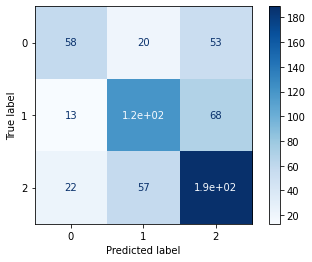

In [50]:
plot_confusion_matrix(knn_clf,X_test,y_test,cmap=plt.cm.Blues)

**MLP**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print(X_train.shape); print(X_test.shape)

(2400, 9)
(600, 9)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, predict_test, average= 'macro')
recall = recall_score(y_test, predict_test, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, predict_test))
print('F1 Score: %.3f' % f1_score(y_test, predict_test, average= 'macro'))

Precision: 0.149
Recall: 0.333
Accuracy: 0.447
F1 Score: 0.206


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[   0    0  500]
 [   0    0  869]
 [   0    0 1031]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.00      0.00      0.00       869
           2       0.43      1.00      0.60      1031

    accuracy                           0.43      2400
   macro avg       0.14      0.33      0.20      2400
weighted avg       0.18      0.43      0.26      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DBN**

In [ ]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 8.0 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from dbn.tensorflow import SupervisedDBNClassification
import numpy as np
import pandas as pd
from sklearn.metrics.classification import accuracy_score

ModuleNotFoundError: ignored

In [ ]:
digits = pd.read_csv("train.csv")
from sklearn.preprocessing import standardscaler
X = np.array(digits.drop(["label"], axis=1))
Y = np.array(digits["label"])
ss=standardscaler()
X = ss.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
classifier = SupervisedDBNClassification(hidden_layers_structure =[256, 256], learning_rate_rbm=0.05, learning_rate=0.1, n_epochs_rbm=10, n_iter_backprop=100, batch_size=32, activation_function='relu', dropout_p=0.2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('\nAccuracy of Prediction: %f' % accuracy_score(x_test, y_pred))

NameError: ignored